<a href="https://colab.research.google.com/github/jtao/AdvancedML/blob/main/Gaussian_Process_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Ridge Regression, SVM & Gaussian Process Regression


The linear model implies that the target is specified as a linear combination of features. This section will cover the content listed below:

- [Kernel Ridge Regression](#Kernel-Ridge-Regression)
- [Support Vector Machine](#Support-Vector-Machine)
- [Support Vector Regression](#Support-Vector-Regression)
- [Gaussian Process Regression](#Gaussian-Process-Regression)
- [Reference](#Reference)


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

<a id = 'kernelridge'></a>
## Kernel Ridge Regression

Kernel ridge regression is a non-parameteric form of ridge regression. The aim is to learn a function in the space induced by the respective kernel $k(\cdot)$ by minimizing a squared loss with a squared norm regularization term.

Recall the ridge linear regression with the objective function is defined as following,
$$\min\sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2$$
where $\lambda$ is a tuning parameter that controls the strength of the penalty.

Now we consider the model of form $y = f(x) + \epsilon$ with estimation of $f$ by solving an optimization problem over
$$\hat{f} = \text{argmin}_{f\in\mathcal{H}}\frac{1}{2}\sum_{i=1}^n(y_i - f(x_i))^2 + \frac{\lambda}{2}||f||_{\mathcal{H}}^2$$

*Representer Theorem*: Let $\Omega:[0,+\infty)\rightarrow\mathbb{R}$ be strictly increasing and let $\ell: (X\times Y\times \mathbb{R})^n\rightarrow \mathbb{R} \cup \{+\infty\}$ by a loss function. Consider
$$\min_{f\in\mathcal{H}}\ell(x^{(i)},y^{(i)}, f(x^{(i)})) + \lambda_n \Omega(||f||_{\mathcal{H}}^2)$$ where $\mathcal{H}$ is an RKHS with kernel $\mathbb{K}$. Then any optimal solution has the following form:
$$f(\cdot) = \sum_i^n \alpha_i\mathbb{K}(\cdot, x^{(i)})$$

Therefore, any solution of $\hat{f}(\cdot)$ takes the form $$\hat{f} = \sum_{i=1}^n\alpha_i\mathbb{K}(\cdot, x_j), K_{ij} = \mathbb{x_i, x_j}.$$ We can obtain the following equivalent problem:
$$\hat{\alpha} = \text{argmin}_{\alpha \in\mathbb{R}^n}\frac{1}{2}||f-\mathbf{K}\alpha||_2^2+\frac{\lambda}{2}\alpha^T\mathbf{K}\alpha$$

By taking the gradient and reorganizing, we can get the closed solution of form $$\hat{\alpha} = (\mathbf{K} + \lambda I)^{-1}y$$ and this gives the estimate of $f$ as
$$\hat{f}(\cdot) = \sum_i^n\hat{\alpha}_i\mathbb{K}(\cdot, x_i)$$


### Example
We generate a dataset with 21 points in which $y$ is calculated as following
$$y = (x + 4) \cdot (x + 1) \cdot (x - 1)\cdot (x-3) + runif(-1, 1)$$

In [ ]:
import random
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# initialize lists and set random seed
x = []
y = []
random.seed(2021)

for i in range(-10, 11):
    xi = i/2
    err = random.uniform(-1, 1)
    yi = (xi + 4) * (xi + 1) * (xi - 1) * (xi - 3) + err
    x.append(xi)
    y.append(yi)

x_pred = np.arange(-5, 5, 0.1).reshape(-1, 1)
x = np.array(x).reshape(-1, 1)

In [ ]:
# simple linear regression
regr = LinearRegression()
regr.fit(x, y)
y_fit_regr = regr.predict(x)
y_pred_regr = regr.predict(x_pred)

# ridge regression
ridge_regr = Ridge(alpha = 1.0)
ridge_regr.fit(x,y)
y_fit_rg = ridge_regr.predict(x)
y_pred_rg = ridge_regr.predict(x_pred)

In [ ]:
# random select a degree for polynomial example
degree_value = 3
krr = KernelRidge(alpha = 1.0, kernel='polynomial', degree=degree_value)
krr = krr.fit(x, y)
y_pred_krr = krr.predict(x_pred)
y_fit_krr = krr.predict(x)

# Print rmse value
rmse_lr = np.sqrt(mean_squared_error(y_fit_regr, y))
rmse_rg = np.sqrt(mean_squared_error(y_fit_rg, y))
rmse_krr = np.sqrt(mean_squared_error(y_fit_krr, y))

print('############ Simple Linear Model ##############')
print('Root Mean Squared Error: %.5f\n' % rmse_lr)

print('############# Ridge Regression ################')
print('Root Mean Squared Error: %.5f\n' % rmse_rg)

print('########## Kernel Ridge Regression ############')
print('Degree:', degree_value)
print('Root Mean Squared Error: %.5f' % rmse_krr)

############ Simple Linear Model ##############
Root Mean Squared Error: 104.08563

############# Ridge Regression ################
Root Mean Squared Error: 104.08591

########## Kernel Ridge Regression ############
Degree: 3
Root Mean Squared Error: 56.14879


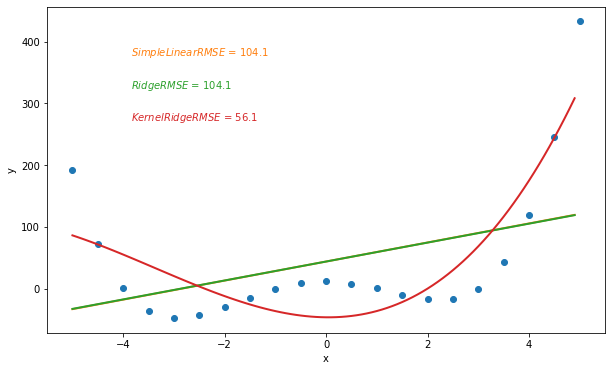

In [ ]:
# Set axes and labels
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.annotate(u'$Simple Linear RMSE$ = %.1f' % rmse_lr, xy=(0.15,0.85), xycoords='axes fraction', color = 'C1')
ax.annotate(u'$Ridge RMSE$ = %.1f' % rmse_rg, xy=(0.15,0.75), xycoords='axes fraction', color = 'C2')
ax.annotate(u'$Kernel Ridge RMSE$ = %.1f' % rmse_krr, xy=(0.15,0.65), xycoords='axes fraction', color = 'C3')



# Plot as blue points the original database
plt.scatter(x, y,color='C0')

# Plot as orange line the regression line at interval
plt.plot(x_pred, y_pred_regr, color = 'C1', linestyle ='solid', linewidth = 2)
plt.plot(x_pred, y_pred_rg, color = 'C2', linestyle ='solid', linewidth = 2)
plt.plot(x_pred, y_pred_krr, color = 'C3', linestyle ='solid', linewidth = 2)

plt.show()

## Kernels

Suppose we are given data with $x_i$ being the inputs and $y_i$ being the targets, $$(x_1,y_1), \ldots, (x_n,y_n)\in \mathcal{X}\times \mathcal{Y}$$
In learning, we want to get a model that can be able to generalize to unseen data points, meaning that we want to choose $y$ such that $(x,y)$ is in some sense similar to the training data. A similarity measure is required,
$$k:\mathcal{X}\times\mathcal{X}\rightarrow \mathbb{R}, (x, x') \mapsto k(x, x')$$
satisfying, for all $x, x'\in \mathcal{X}$,
$$k(x, x') = <\Phi(x), \Phi(x')>$$
where $\Phi$ maps into some feature space $\mathcal{H}$. The similarity measure $k(\cdot)$ is called *kernel* and $\Phi$ is called its *feature map*.

Some common choices of kernels:

*   Radial-basis function (RBF) kernel: $$k(x_i, x_j) = \exp\left(-\frac{d(x_i, x_j)^2}{2l^2}\right)$$
*   Matern kernel: $$k(x_i, x_j) = \frac{1}{\Gamma(\nu)2^{\nu - 1}}\left(\frac{\sqrt{2\nu}}{l}d(x_i, x_j)\right)^{\nu}K_{\nu}\left(\frac{\sqrt{2\nu}}{l}d(x_i, x_j)\right)$$
*   Absolute exponential kernel: (Matern kernel with $\nu = 1/2$) $$k(x_i, x_j) = \exp{\left(-\frac{d(x_i,x_j)}{l}\right)}$$
*   Rational quadratic kernel: $$k(x_i, x_j) = \left(1 + \frac{d(x_i, x_j)^2}{2\alpha l^2}\right)^{-\alpha}$$

## Support Vector Machine


Support Vector Machine (SVM) is supervsied learning classification algorithm. Consider a simple binary classification problem. Assume we have a linearly separable data in 2-dim. We try to find a boundary that divides the data into two class such that the misclassification can be minimized. Notice that different lines can be used as separators between samples. Depending on the line we choose, a new point marked by 'x' in the plot will be assigned a different label.

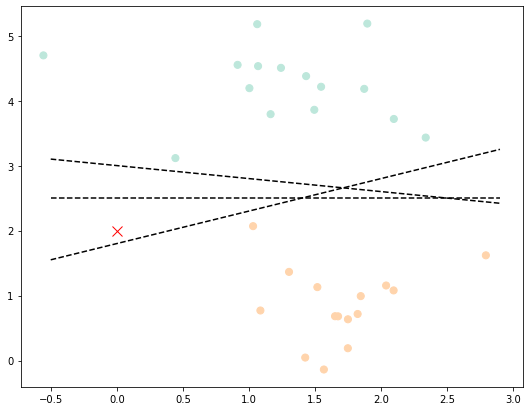

In [ ]:
from scipy import stats
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 30, centers = 2, random_state = 0, cluster_std = 0.6)

plt.figure(figsize=(9, 7))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "icefire")

xfit = np.arange(-0.5, 3.0, 0.1)
for m, b in [(0.0, 2.5), (0.5, 1.8), (-0.2, 3.0)]:
    plt.plot(xfit, m * xfit + b, '--k')

plt.plot([0.0], [2.0], 'x', color = 'red', markersize = 10)
plt.show()

SVMs provide a way to improve this with the intuition: rather than simply drawing a zero-width line between the classes, consider each line with a margin of certain width, meaning that we don't worried about the errors as long as the errors fall within a prespecified region. In SVMs, the line that maximizes this margin is the one to be chosen as the optimal model.

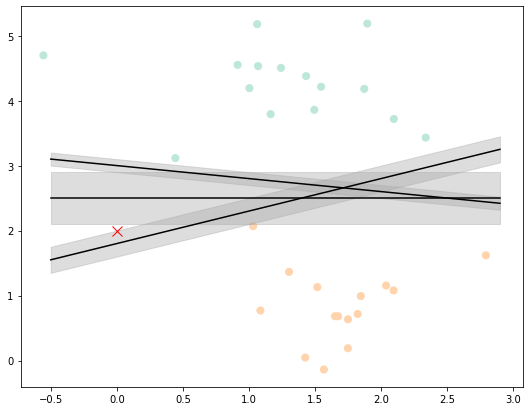

In [ ]:
plt.figure(figsize=(9, 7))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "icefire")


xfit = np.arange(-0.5, 3.0, 0.1)
for m, b, d in [(0.0, 2.5, 0.4), (0.5, 1.8, 0.2), (-0.2, 3.0, 0.1)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.plot([0.0], [2.0], 'x', color = 'red', markersize = 10)
plt.show()

To fit a SVM model on this generated dataset.

In [ ]:
# for visualization
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

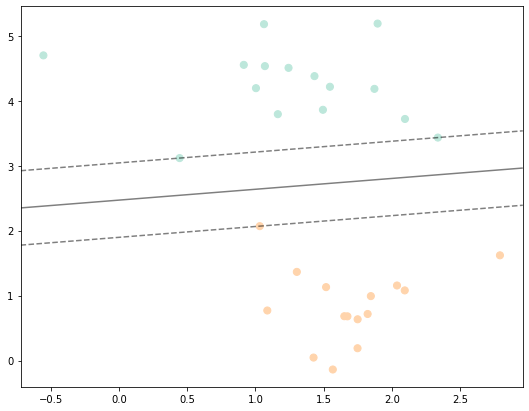

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.figure(figsize = (9, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='icefire')
plot_svc_decision_function(model)

This is the dividing line that maximizes the margin between two sets of points. There are some points touching the margin which are the pivotal elements of this fit known as the support vectors and can be returned by `support_vectors_`. A key to this classifier is that only the position of the support vectors matter. The points that are further away from the margin on the correct side do not change the fit.

In [ ]:
model.support_vectors_

array([[2.33812285, 3.43116792],
       [0.44359863, 3.11530945],
       [1.03150541, 2.0681289 ]])

This method can be extended to nonlinear boundaries with kernels which gives the Kernel SVM where we can map the data into higher-dimensional space defined by basis function and find a linear classifier for the nonlinear relationship.

### Example

Use the labeled faces of various public figures in the Wild dataset as an example. Eight public figures are included. Each image is of size $62 \times 47$. We can use the pixels directly as a feature, but it's more efficient to do some preprocessing before hand, e.g. extract some fundamental components.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


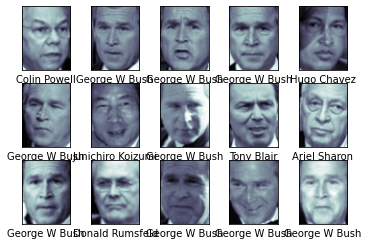

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 43 s, sys: 24.4 s, total: 1min 7s
Wall time: 41 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

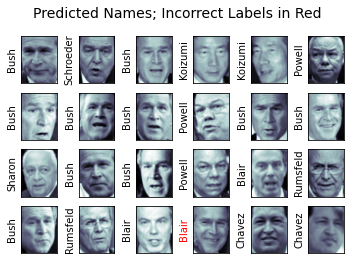

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



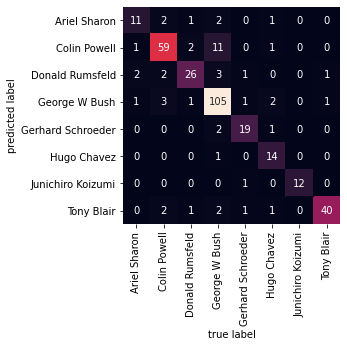

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Support Vector Regression
The Support Vector Regression uses the same principles as the SVM for classification. The differenced are as following:
* The output is a real number, inifinite possibilities
* A margin of tolerance is set in approximation to the SVM





However, if we only need to reduce the errors to a certain degree, meaning as long as the errors fall within an acceptable range.

For illustrution, consider the relationship between TV and Sales. The plot below shows the results of a trained SVR model on the Advertising dataset. The red line represents  the line of simple linear regression fit. The gray dashed lines represent the margin of error $\epsilon = 5$.

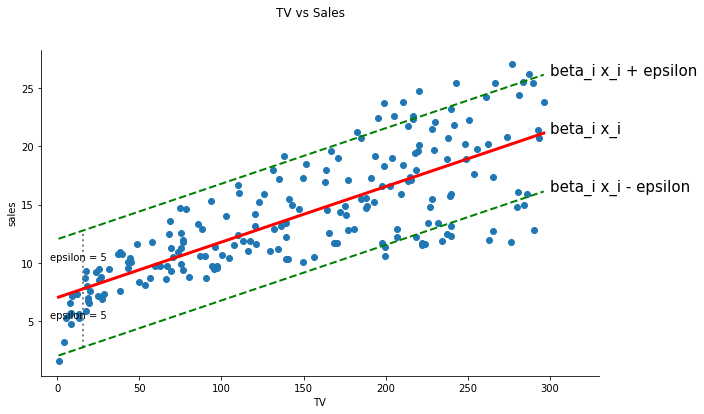

In [ ]:
from sklearn import linear_model
advertising = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/Advertising.csv', usecols=[1,2,3,4])

# Visualization
X = advertising.TV
X = X.values.reshape(-1, 1)
y = advertising.Sales

# simple linear regression
regr = linear_model.LinearRegression()
regr.fit(X,y)

xfit = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
yfit = regr.predict(xfit)
yfit_ub = yfit + 5
yfit_lb = yfit - 5

plt.figure(figsize = (10, 6))
plt.suptitle('TV vs Sales')
plt.scatter(X,y)
plt.xlim(-10, 330)
plt.xlabel("TV")
plt.ylabel("sales")
plt.plot(xfit, yfit, 'r',linewidth = 3)
plt.plot(xfit, yfit_lb, 'g--', linewidth = 2)
plt.plot(xfit, yfit_ub, 'g--', linewidth = 2)
plt.vlines(x= xfit[50], ymin=yfit[50], ymax=yfit_ub[50], colors='gray', ls=':', lw=2)
s = 'epsilon = 5'
plt.text(xfit[50]-20, 0.5 * (yfit[50] + yfit_ub[50]), s)
plt.vlines(xfit[50], ymin=yfit_lb[50], ymax=yfit[50], colors='gray', ls=':', lw=2)
plt.text(xfit[50]-20, 0.5 * (yfit[50] + yfit_lb[50]), s)

s = 'beta_i x_i'
plt.text(300, yfit[-1], s, fontsize = 15)
s = 'beta_i x_i + epsilon'
plt.text(300, yfit_ub[-1], s, fontsize = 15)
s = 'beta_i x_i - epsilon'
plt.text(300, yfit_lb[-1], s, fontsize = 15)

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In constrast to OLS, the objective function of SVR is to minimize the coefficients, the $l_2$-norm of the coefficients,
$$\min \frac{1}{2}||w||^2$$
and use the error term as the constraints as following,
$$|y_i - w_ix_i|\leq \epsilon$$


## Gaussian Process Regression

**Gausian processes** are a supervised learning method designed to solve regression and probabilistic classification problems.

The advantages of Gaussian processes are:
* The prediction interpolates the observations (at least for regular kernels).
* The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.
* Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of Gaussian processes include:

* They are not sparse, i.e., they use the whole samples/features information to perform the prediction.
* They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

Implementation of Gaussian processes for regression purposes gives the Gaussian process regression (GPR). The prior of the GP needs to be specified. The prior mean is assumed to be constant. The prior covariance is specified through a kernel object.

The Bayesian approach infers a probability distribution over all possible values. Assume the linear function as following,
$$\mathbf{y} = \mathbf{w}\mathbf{x} + \boldsymbol{\epsilon}$$

The Bayesian approach specifies a prior distribution for $p(\mathbf{w})$ on the parameter $\mathbf{w}$ and relocating probabilities based on the observed data using Bayes' Rule:
$$p(\mathbf{w}|\mathbf{y}, \mathbf{x}) = \frac{p(\mathbf{y}|\mathbf{x},\mathbf{w})p(\mathbf{w})}{p(\mathbf{y}|\mathbf{x})}$$

To get the predictions at unseen points of interest $mathbf{x}^*$, the predictive distribution can be calculated by weighting all possible predictions by the posterior distribution
$$p(f^*|\mathbf{x}^*, \mathbf{y},\mathbf{x}) = \int_{\mathbf{w}}p(f^*|x^*, w)p(w|y, x)$$

In GPR, we first assume a Gaussian process prior through the mean and covariance function, like an infinite-dimensional multivariate Gaussian distribution.
$$f(x)\sim GP(m(x), k(x, x'))$$
$$y\sim GP(m(x), k(x, x') + \delta_{ij}\sigma^2), \text{ where }y = f(x) + \epsilon, \epsilon \sim N(0, \sigma^2)$$
From the Gaussian process prior, the collection of training and test data points are joint multivariate Gaussian distributed, so the joint distribution can be written as
$$\left[\begin{array}{c}
y\\
f^*
\end{array}\right]\sim \mathcal{N}\left(\boldsymbol{\mu}^*, \boldsymbol{\Sigma}^*\right)$$
where
$$\boldsymbol{\mu}^* = [\boldsymbol{\mu}, \mu^*], \boldsymbol{\Sigma^*} = \left[\begin{array}{cc}
K(X, X)+\sigma^2 I & K(X, x^*)\\
K(x^*, X) & K(x^*, x^*)\end{array}\right]$$

### Example

Random generate data from a uniform distribution.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C

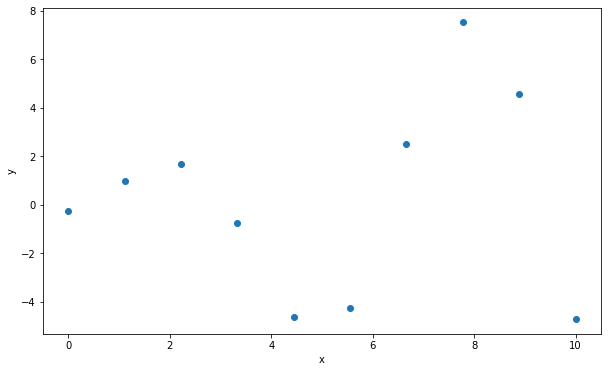

In [ ]:
rng = np.random.RandomState(1)
X = np.linspace(0, 10, 10)
y = X * np.sin(X)
dy = 0.1 + 0.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
# GaussFeats = GaussianFeatures(10).fit_transform(x.reshape(-1, 1))

plt.figure(figsize = (10, 6))
# plt.subplot(1,2,1)
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

# plt.subplot(1,2,2)
# for i in range(10):
#     plt.plot(x, GaussFeats[:, i], '--', color = 'C'+ str(i),  linewidth = 0.5)

# plt.xlabel('x')
# plt.ylabel('Gaussian Features')

plt.show()

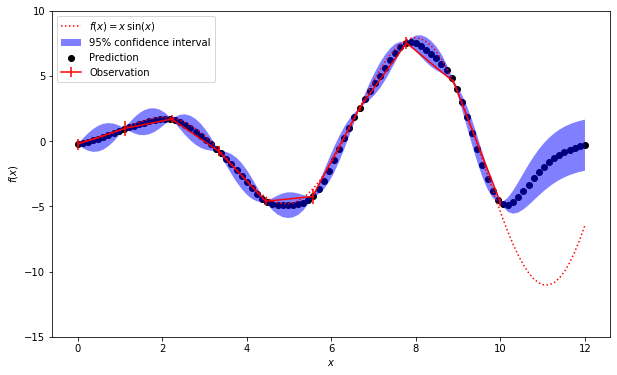

In [ ]:
x = np.linspace(0, 12, 100)

# Instantiate a Gaussian Process model
kernel = Matern(nu = 2.5)
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X.reshape(-1, 1), y)

# Make the prediction on the testing dataset (ask for MSE as well)
y_pred, sigma = gp.predict(x.reshape(-1, 1), return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(10,6))
plt.plot(x, x * np.sin(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.scatter(x, y_pred, color = 'black', label='Prediction')
plt.errorbar(X, y, dy, label = 'Observation', color = 'red')
plt.fill(np.concatenate([x.reshape(-1, 1), x.reshape(-1, 1)[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-15, 10)
plt.legend(loc='upper left')

plt.show()

### A real data example

The data relates to an inverse dynamics problem for a seven degrees-of-freedom SARCOS anthropomorphic robot arm. The task is to map from a 21-dimensional input space (7 joint positions, 7 joint velocities, 7 joint accelerations) to the corresponding 7 joint torques. Following previous work we present results for just one of the seven mappings, from the 21 input variables to the first of the seven torques. The training data is of size $44484 \times 28$ and the test data is of size $4449 \times 28$.
The first 21 columns are the input variables, and the 22nd column is used as the target variable.

In [ ]:
training_data = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/sarcos_inv.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/sarcos_inv_test.csv')

X_train = training_data.iloc[:100, 1:22]
y_train = training_data.iloc[:100, 22]
X_test = test_data.iloc[:, 1:22]
y_test = test_data.iloc[:, 22]

In [ ]:
# Instantiate a Gaussian Process model
kernel = Matern(nu = 2.5)
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the testing dataset (ask for MSE as well)
y_pred, sigma = gp.predict(X_test, return_std=True)

MSE_test = np.mean(np.power(y_pred - y_test, 2))
print("MSE for the test set by GPR: ", MSE_test)

# Linear & Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_lr = regr.predict(X_test)

MSE_test = np.mean(np.power(y_pred_lr - y_test, 2))
print("MSE for the test set by linear model: ", MSE_test)

ridge_regr = Ridge(alpha = 2.0)
ridge_regr.fit(X_train,y_train)
y_pred_rg = ridge_regr.predict(X_test)

MSE_test = np.mean(np.power(y_pred_rg - y_test, 2))
print("MSE for the test set by Ridge model: ", MSE_test)

MSE for the test set by GPR:  362.69497537392914
MSE for the test set by linear model:  711519.7547611272
MSE for the test set by Ridge model:  246.41148282513618


## Reference
* [Notes for kernel ridge regression by Max Welling](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-Ridge.pdf)

## Hands-on exercises
### Classification

Please try to implement the SVM for classification of MNIST hand written digits dataset. Remember that different hyperparameters can have affect the results.

1. Prepare data: Load the MNIST dataset using `load_digits` from `sklearn.datasets`
2. Prepare the tool: load `svm` from `sklearn`
3. Split the data into training set and test set: use 70% for training and the remaining for testing, get help from `train_test_split` from `sklearn.model_selection`
4. Select the evaluation metric to evaluate the classification result
5. Try SVM with different settings and save the accuracy score in a dictionary with key being `kernel name_C`
 * $C = [0.001, 0.1, 0.5, 1, 10, 100]$ (Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.)
 * kernel = \{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’\} (Specifies the kernel type to be used in the algorithm.)
 6. Visualize the first 4 results in the test set using polynomial kernel with $C = 0.1$.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

# loading data
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17              #test_size controls the proportion of test data in the whole data
)
n_samples = len(data.images)
print(n_samples)

1797


In [ ]:
C_list = np.array([0.001, 0.1, 0.5, 1, 10, 100])
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

accuracy_score_dict = dict()
for cc in C_list:
    for kern in kernel_list:
        clf_svm = svm.SVC(C = cc, kernel = kern)
        clf_svm.fit(X_train, y_train)
        svm_pred = clf_svm.predict(X_test)
        accuracy_score_dict[kern + '_' + str(cc)] = accuracy_score(y_test,svm_pred)

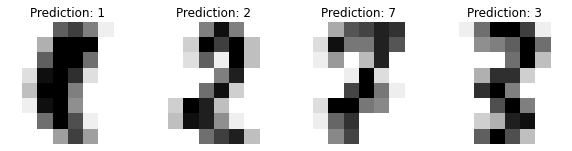

In [ ]:
clf_svm = svm.SVC(C = 0.1, kernel = 'poly')
clf_svm.fit(X_train, y_train)
svm_pred = clf_svm.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, svm_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

### Regression